In [8]:
import numpy as np
import pandas as pd

# Visualizations Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# DateTime Libraries
import time, datetime

# Escape Warnings

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv(r"/content/My Uber Drives - 2016.csv",encoding='latin1')
df.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [14]:
df.columns = df.columns.str.replace("*","")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [16]:
df.shape

(1156, 7)

In [17]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 1156 rows and 7 columns are present in the Data Set


In [18]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [19]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

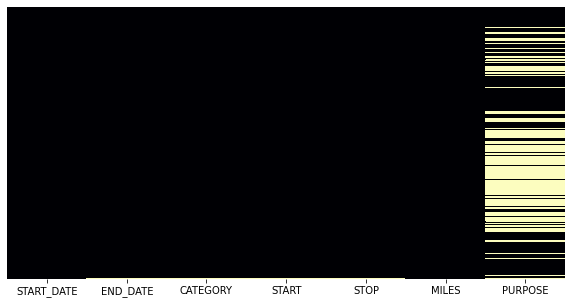

In [20]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

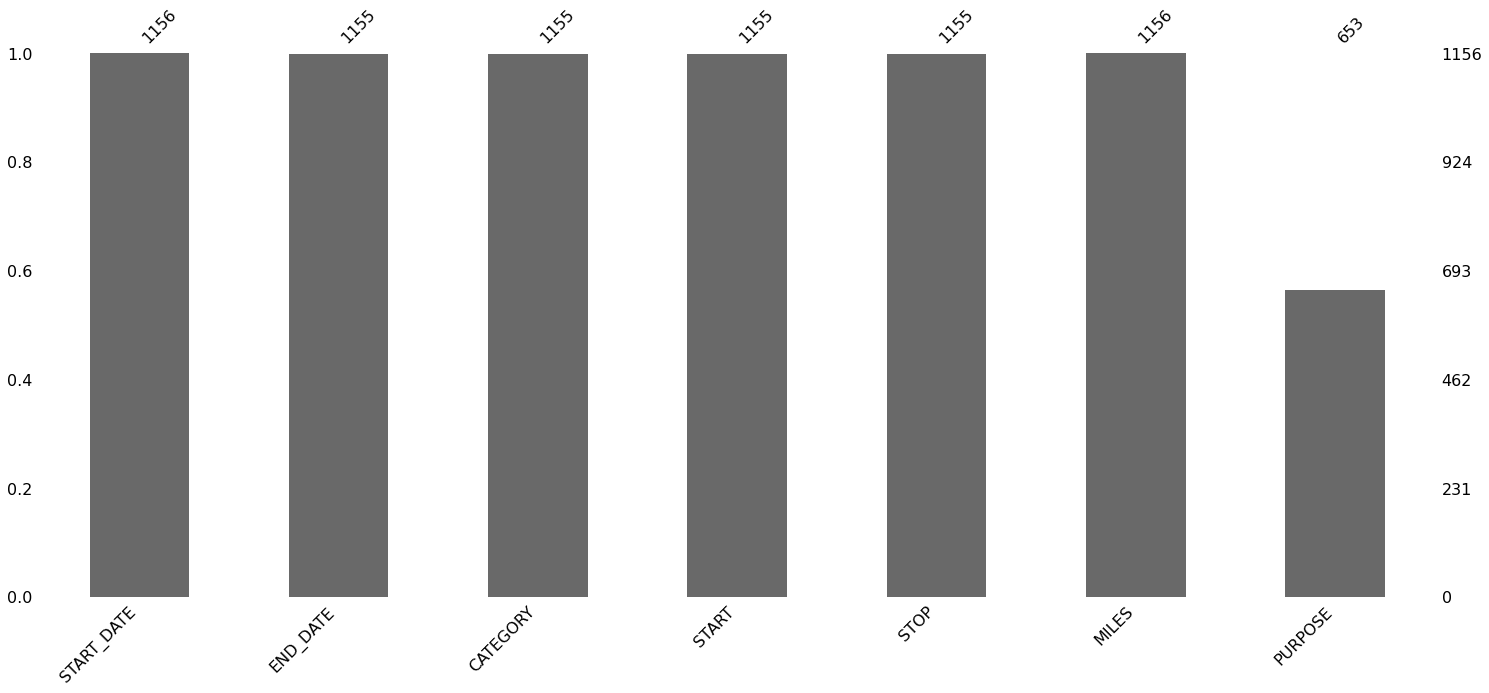

In [21]:
#visualizing the null values for each attribute

import missingno as msno

msno.bar(df)
plt.show()

In [22]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [23]:
df.drop(index = 1155, axis = 0, inplace = True)

In [24]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [25]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

In [26]:
# filling a null values using fillna() 

df["PURPOSE"].fillna(method='ffill', inplace = True) 

In [27]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


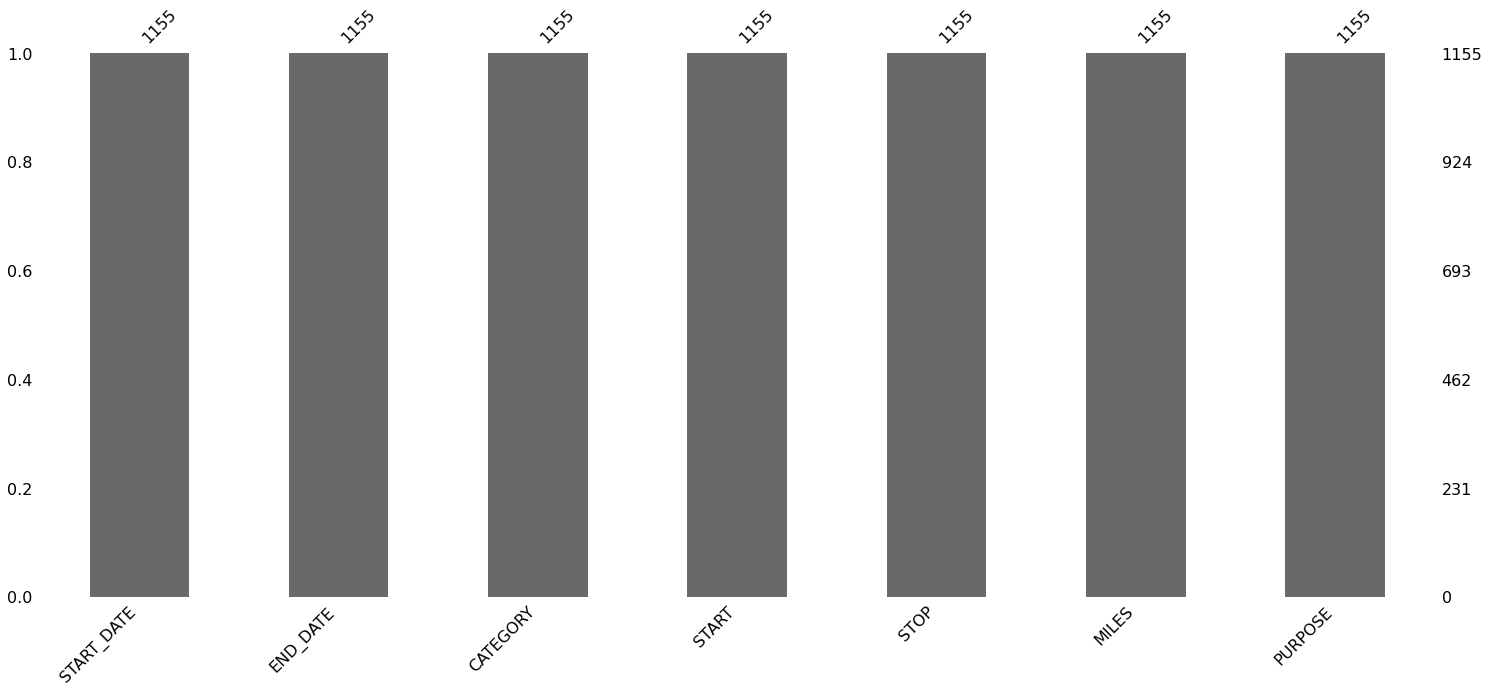

In [28]:
# MISSINGO

import missingno as msno
msno.bar(df)
plt.show()

In [29]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [30]:
# Start Date and End Date

df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


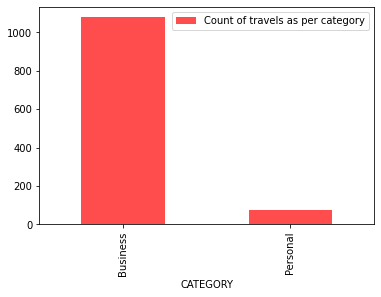

In [31]:
Category =pd.crosstab(index=df['CATEGORY'],columns='Count of travels as per category')

Category.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
Category

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
Kissimmee            11
R?walpindi           11
Kenner               11
Name: START, dtype: int64


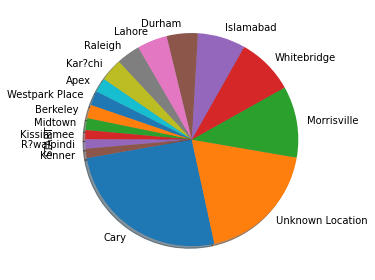

In [32]:
#highest start point
Start_point = df.START.value_counts()
Start_point
print(Start_point[Start_point > 10])


Start_point[Start_point > 10].plot(kind = "pie", shadow=True, startangle=190)
plt.tight_layout()
plt.show()


In [33]:
#lowest start point
Start_point = df.START.value_counts()
Start_point
Start_point[Start_point <=  10]

New Orleans      10
Emeryville       10
Downtown          9
San Francisco     8
Colombo           8
                 ..
Sky Lake          1
Wake Co.          1
Redmond           1
Bellevue          1
Fuquay-Varina     1
Name: START, Length: 161, dtype: int64

In [34]:
#highest stop point
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point >=  10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Kenner               10
New Orleans          10
Edgehill Farms       10
Name: STOP, dtype: int64

In [35]:
#lowest stop point
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point <=  10]

Kenner            10
New Orleans       10
Edgehill Farms    10
Emeryville         9
Central            9
                  ..
South Berkeley     1
Bellevue           1
Stonewater         1
Midtown West       1
Cedar Hill         1
Name: STOP, Length: 173, dtype: int64

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64


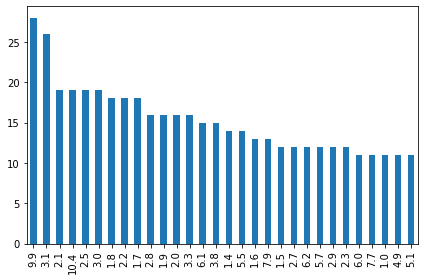

In [36]:
# miles
Miles = df.MILES.value_counts()
Miles
print(Miles[Miles> 10])


Miles[Miles> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()

col_0,Count of Miles
MILES,
False,840
True,315


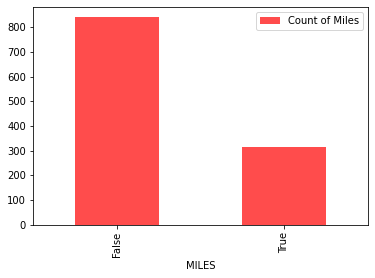

In [37]:
Miles =pd.crosstab(index=df["MILES"]>10,columns='Count of Miles')

Miles.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
Miles

In [38]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


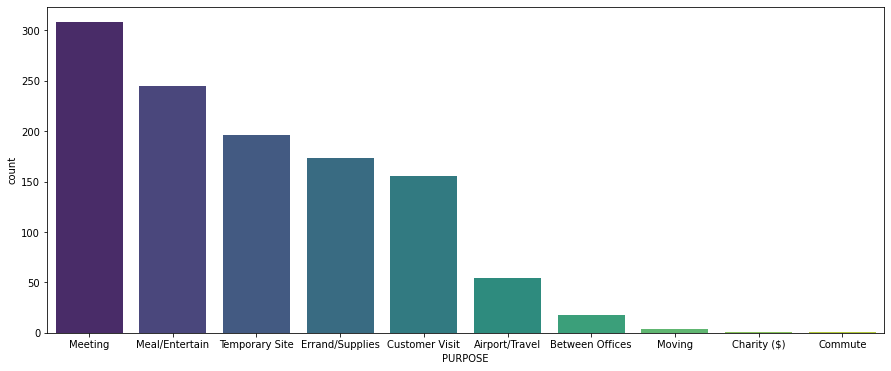

In [39]:
# Purpose of most cab rides

plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

In [40]:
# For future Analysis
# Lets calculate the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00


In [41]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [42]:
# Analysis and Visualization
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1), 
              'MIN' : df.groupby(['PURPOSE'])['MILES'].min(), 
              'MAX' : df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


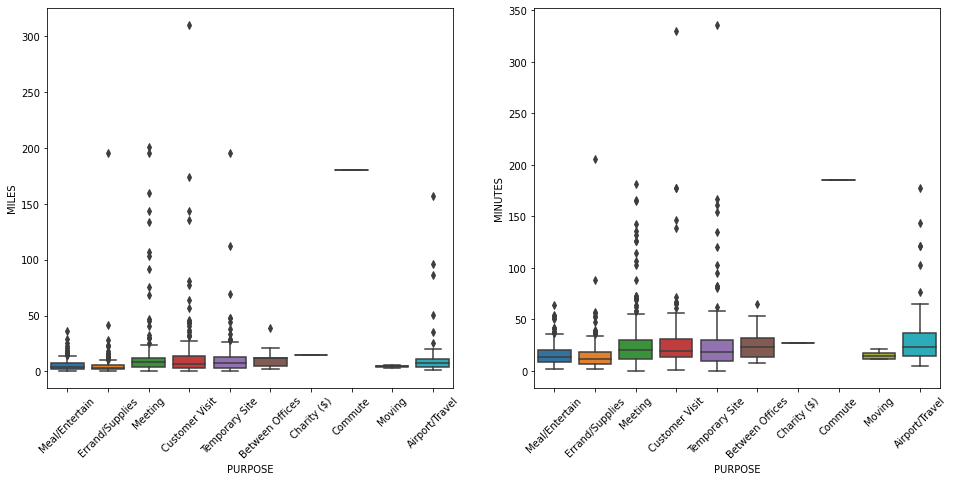

In [43]:
# BOX plot of MILES and MINUTES split by PURPOSE
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

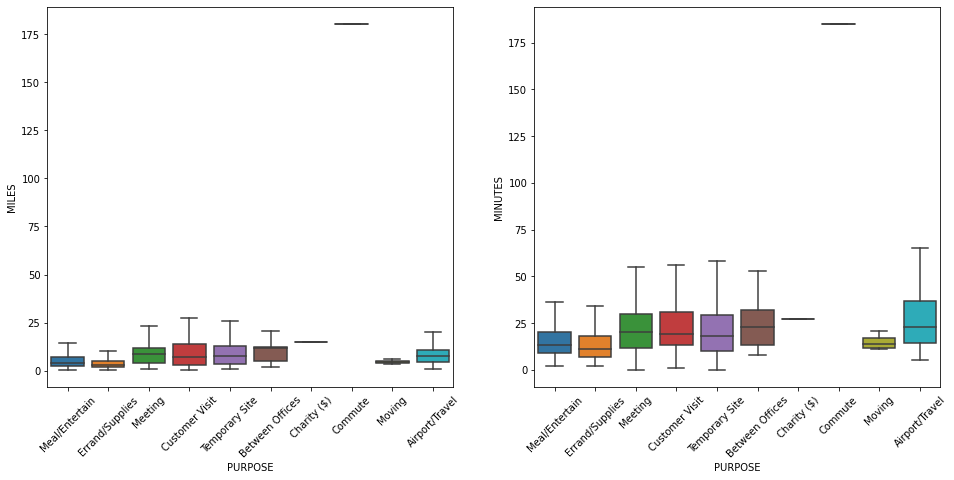

In [44]:
# Boxplots of MILES and MINUTES based on PURPOSE without outliers

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

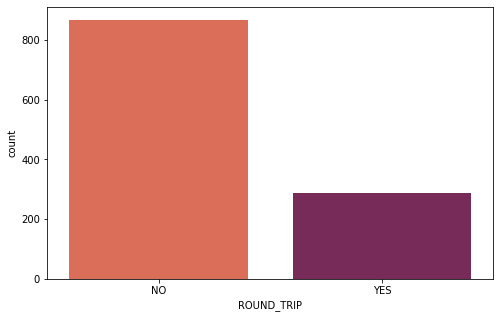

In [45]:
# Checking how many are the ROUND TRIPS i.e. start and stop points are same

plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP'] = df.apply(round, axis=1)

sns.countplot(df['ROUND_TRIP'], order=df['ROUND_TRIP'].value_counts().index, palette='rocket_r')
plt.show()

In [46]:
# Entering Month Name and evaluating Frequency of Trip in each Month

df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [47]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

In [48]:
df['MONTH'] = df['MONTH'].map(dic)

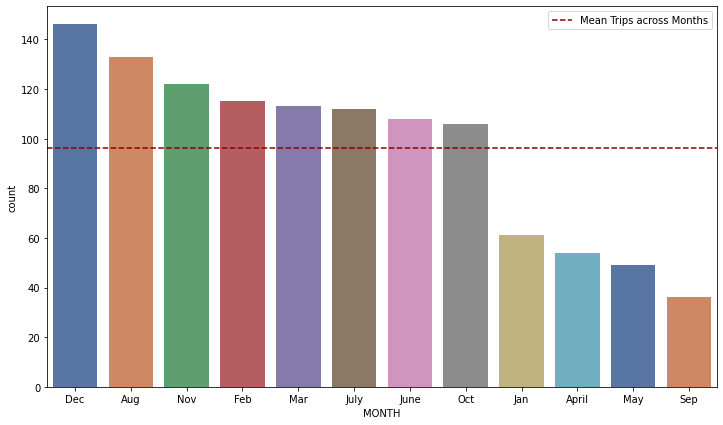

In [49]:
# When are cab rides more popular (frequently used)?

plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'], order=df['MONTH'].value_counts().index, palette='deep')
plt.axhline(df['MONTH'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

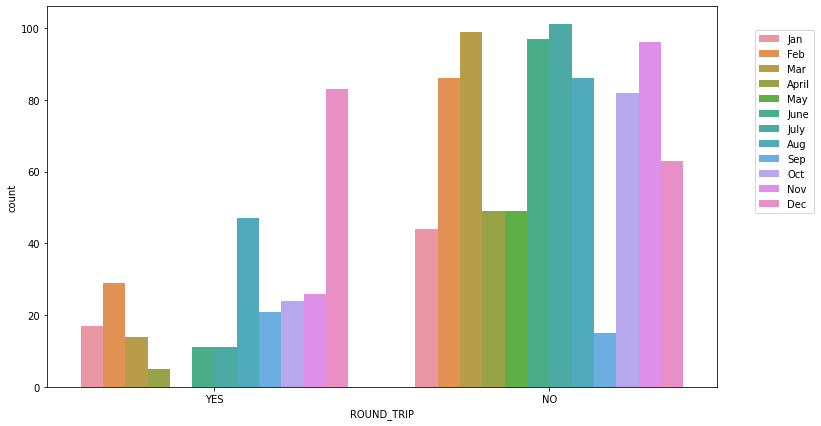

In [50]:
# Round Trip against Months

plt.figure(figsize=(12,7))
a=sns.countplot(df['ROUND_TRIP'],hue=df['MONTH'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

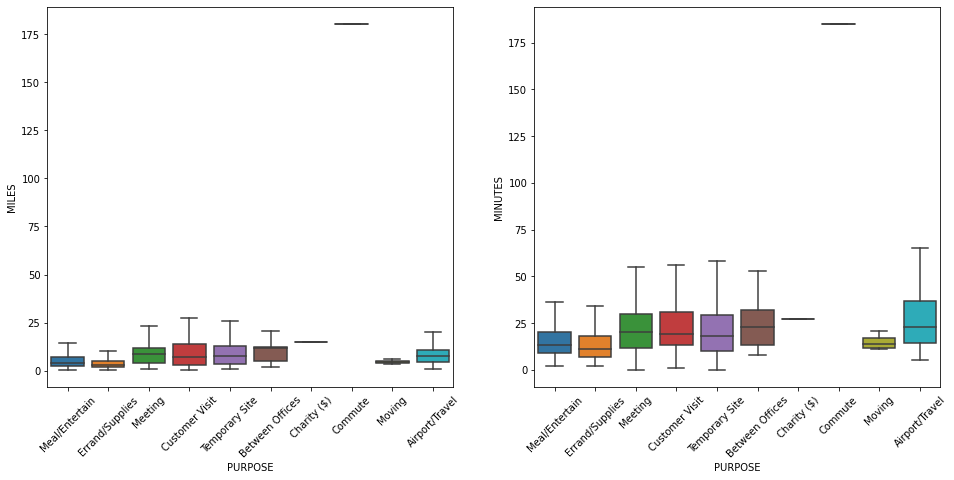

In [51]:
# How does the PURPOSE of Cab ride vary with time and distance?

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES, showfliers = False)
plt.xticks(rotation = 45);

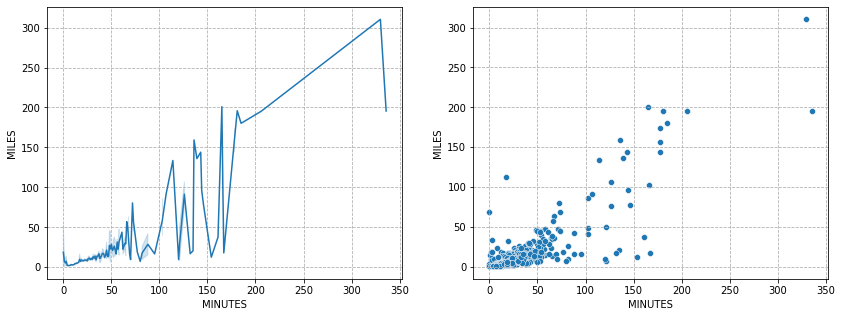

In [52]:
# Plots of MILES with respect to MINUTES

plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

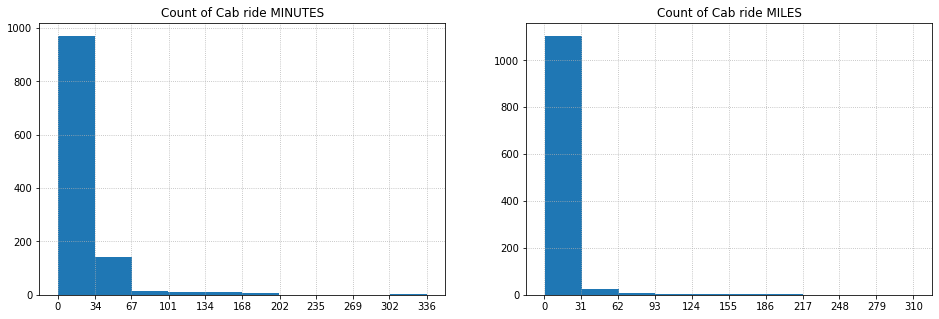

In [53]:
# cab rides took more time for less distance.

plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MILES");

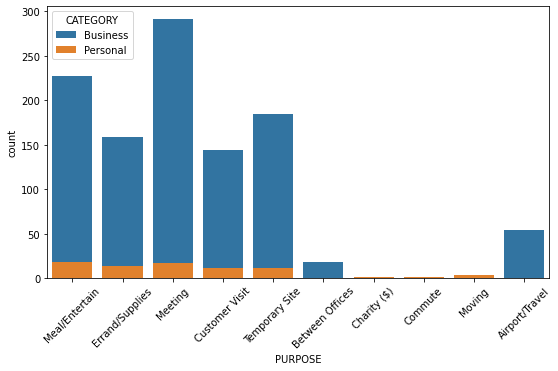

In [54]:
# Distribution of Cab rides based on Category

plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

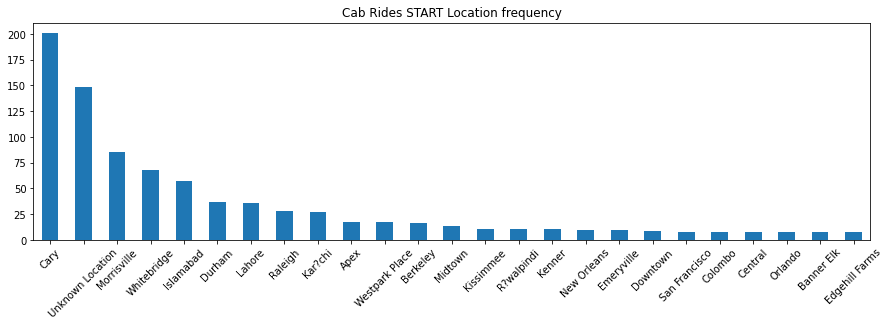

In [55]:
# Frequency of Cab Rides START

plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

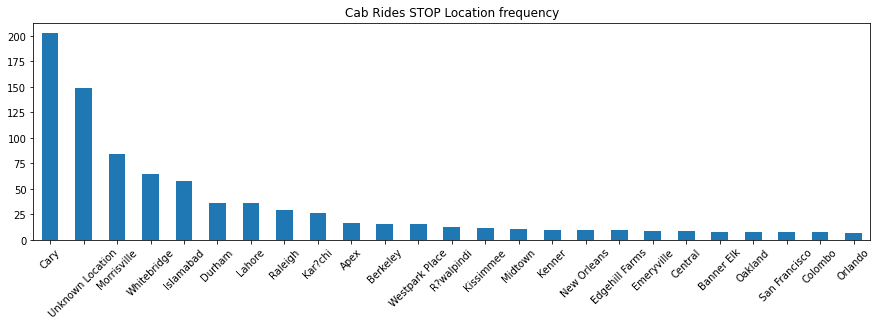

In [56]:
# Frequency of Cab Rides STOP

plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);

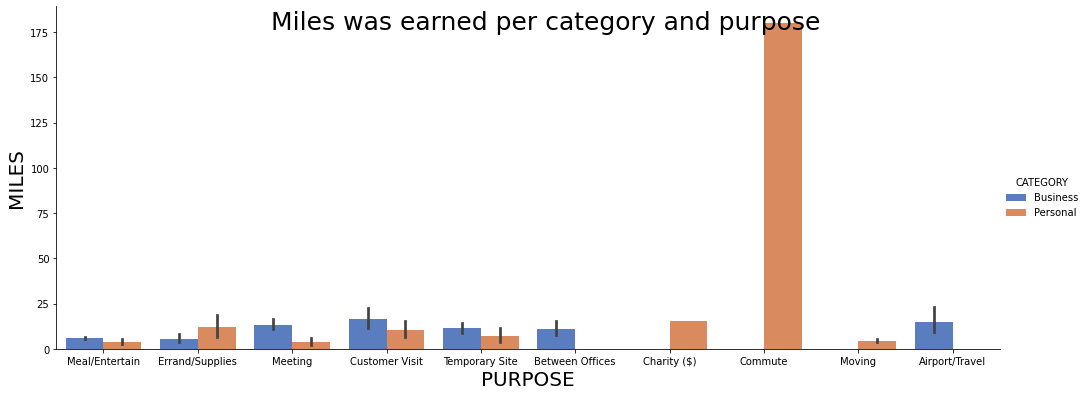

In [57]:
#How many miles was earned per category and purpose ?

g = sns.factorplot(x="PURPOSE", y="MILES", hue="CATEGORY", data=df,
                   size=15, kind="bar", palette="muted")
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer; private: commute and charity 

g.fig.suptitle('Miles was earned per category and purpose', fontsize= 25)
g.fig.set_size_inches(15, 5)
g.set_xlabels('PURPOSE', fontsize= 20)
g.set_ylabels('MILES', fontsize= 20)

**Conclusion:**
1. Most of the cab rides are within a distance of 31 miles taking about 34 minutes.
2. Business Cab rides are not only more in volume, but also in distance travelled.
3.Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.
4. Cab traffic is mostly concentrated in 5 cities or localities.
5. Ac seasonal pattern of cab ride volume exists, which is highest on December.